# **Principle of Data Learning**

# 1 Deep dive
pg. 17-24

### Aim of this book:
- Understand the role of **liquidity, equity** and many other key banking features;
- Engineer and select features;
- Predict defaults, payoffs, loss rates and exposures;
- Predict downturn and crisis outcomes using pre-crisis features;
- Understand the implications of COVID-19;
- Apply innovative **sampling techniques** for model training and validation;
- Deep-learn from Logit Classifiers to **Random Forests** and Neural Networks
- Do unsupervised Clustering, Principal Components and **Bayesian Techniques**;
- Build **multi-period** models for CECL, IFRS 9 and CCAR;
- Build credit portfolio correlation models for value-at-risk and expected shortfall; and
- Run over 1,500 lines of pandas, statsmodels and scikit-learn Python code (`statsmodels`, `scikit-learn`, ...)
- Access real credit data and much more . . .

### Targetted reader
**Credit analysts** in financial institutions, fin-techs and prudential regulators

### Credit risk information

+ Internal data:
    - origination / underwrinting data: from **LOS**;
    - performance: monthly / quarterly / annually review covered from the orgination to latest review from **LMS**;
    - modification: e.g *restructure???*;
    - payoff / retention;
    - maturity: relates to maturity time like *release of collateal* or various of accounting activities;
    - default / workout: data from default to resolution or collection, can cover up to 10 years!
+ External data:
    - macro: time varying information that is identical at a given period for all borrowers, maybe **stratified** by country, state, statistiscal area, etc;
    - population stats;
    - etc like: business filings, data from social networks, ratings agencies, property appraisers, activity profiles of payment systems or transport systems.

--> Panel data:
+ features (*also known as covariates, risk factors, explanatory variables, independent variables and right-hand side variables*);
+ risk-outcomes (*also known as responses, outputs, dependent variables and left-hand side variables*): default, payoff, loss rates, exposures;
+ for each loan (`i`) and time (`t`).

### Things to consider
- Any information that is used in a model must be **measurable** through **sensor** since the model is used to **predict risk outcomes** for new borrowers, loans;
- Identifiers:
  + *borrowers* or *loans*;
  + time: application time, origination time, observation time, payoff time, default time and maturity time;
  + think about the scenario that the borrower may be part of a larger holding structure, family, or benefit from guarantees that have credit-risk relevant relationships.
- relationships of features and outcomes can be reciprocal or one-way (???).

### The dataset
+ Panel form: 5k residential US mortgage borrower over 60 periods (quarters);
+ Central vars: `id`, and `time`;
+ Starts at the beginning of the millennium, includes the Global Financial Crisis (GFC) in period 27 approximately;
+ Origination times prior to the start of the observation period have negative numbers;
+ Default, payoff and status events are observed one period after features in the same row;
+ LGD and related recoveries are observed between the default and resolution time;
+ The loans are not observed immediately after origination;
+ Order of informations:
    - Borrower IDs;
    - Time stamps;
    - Information features at observation time;
    - Information features at loan origination;
    - Outcome observations.
+ Key variables:
    - `id`: borrower id;
    - `time`: time stamp of observation;
    - `orig_time`: time stamp for origination;
    - `first_time`: time stamp for first observation;
    - `mat_time`: time stamp for maturity;
    - `res_time`: time stamp for resolution;
    - `balance_time`: outstanding balance at observation time;
    - `LTV_time`: loan to value ratio at observation time, in %;
    - `interest_rate_time`: interest rate at observation time, in %;
    - `rate_time`: risk-free rate at observation time, in %;
    - `hpi_time`: house price index at observation time, base year=100;
    - `gdp_time`: GDP growth at observation time, in %;
    - `uer_time`: unemployment rate at observation time, in %;
    - `REtype_CO_orig_time`: real estate type — condominium: 1, otherwise: 0;
    - `REtype_PU_orig_time`: real estate type — planned urban developments: 1, otherwise: 0;
    - `REtype_SF_orig_time`: real estate type — single family home: 1, otherwise: 0;
    - `investor_orig_time`: investor borrower: 1, otherwise: 0;
    - `balance_orig_time`: outstanding balance at origination time;
    - `FICO_orig_time`: FICO score at origination time, in %;
    - `LTV_orig_time`: loan to value ratio at origination time, in %;
    - `Interest_Rate_orig_time`: interest rate at origination time, in %;
    - `state_orig_time`: US state in which the property is located;
    - `hpi_orig_time`: house price index at origination time, base year=100;
    - `default_time`: default outcome at observation time;
    - `payoff_time`: payoff outcome at observation time;
    - `status_time`: default (1), payoff (2) and non-default/non-payoff (0) outcome at observation time;
    - `lgd_time`: LGD outcome, at default time, assuming no discounting of cash flows;
    - `recovery_res`: sum of all outcome cash flows received during resolution period.
+ `lgd_time`, `recovery_res` and `res_time` are only observed for default_time=1 and if the resolution process is complete;
+ `LTV_time` = balance_time / house price at time;
+ house price at time = house price at origination * ( `hpi_time` / `hpi_orig_time` );
+ house price at origination = `balance_orig_time` / `LTV_orig_time`;

### Basel, CECL, IFRS 9, DFAST, CCAR and Stress Tests

Critical standards:
- Basel: **minimum** amount of required Tier I and Tier II capital. Basel may include the various reforms (Basel I to Basel III), and a number of nationally issued guidance notes;
- Current Expected Credit Loss (CECL), IFRS 9: loan loss **provisioning** and **eligible amount** of available Tier I capital;
- National stress tests (e.g., Dodd-Frank Act Stress Test (DFAST) or Federal Reserve Bank (FRB) stress tests in the US): requirement of **additional capital buffers**;
- Comprehensive Capital Analysis and Review (CCAR): requirement of **additional capital buffers**.

Regulations might differ:
- Basel requires through-the-cycle PDs, Downturn EADs and Downturn LGDs. CCAR, CECL;
- IFRS 9 require Lifetime PDs and EADs/LGDs that are based on current economic circumstances and are forward-looking, i.e., take future expectations into account;
- DFAST and FRB stress tests require stressed PDs, LGDs and EADs.

### Lessons from the COVID-19 Crisis

- Impact seems to be more critical than GFC;
- Behaviours by banks and governments might temporarily reduce risk in short-term, but might increase in long-term;
- Variable: `cep_time`;
- Equity next to liquidity is a central aspect, variable `equity_time`;
- Time effects;
- Challenges:
  + *Calculating Crisis PDs without downturn data* -> Model-based measurement of crisis PDs, Parameter-based stress-testing (Margin of conservatism, Bayesian approach); or
  + Scenario-based stress-testing, Parameter-based stress-testing (Regime-switching models);
  + *Liquidity as a driver of default* -> Estimation of models with liquidity as feature; Inclusion of additional liquidity feature (e.g., income over non-discretionary expenses);
  + *Impact of time effects* -> TVA Analysis: control for vintage and age effects through dummy variables or other features that describe the origination process and for time effects  through macroeconomic features;
  + *Low default portfolios* -> Most prudent estimators/Margin of conservatism;
  + *Validation of pre-crisis models* -> Backtesting: split training and validation sample along time dimension;
  + *Ability of machine learning models to predict defaults for severe downturns* -> Backtesting of machine learning approaches;
  + *Adequacy of model estimates for Basel requirements* -> Comparison of Basel capital with expected loss.
- Main elements of the approach in the book:
  + model calibrations should include the latest credit data;
  + features that are identified as drivers of credit risk outcomes should be included in the models;
  + validation should focus on backtesting and include a train-test split along the time line;
  + the adequacy of model estimates for applications like capital adequacy, loan loss provisioning and loan pricing needs to be vetted.

### Machine Learning

- lower variable costs;
- higher degree automatized;
- credit risk generally realizes in time-lags;
- advanced models can adjust quicker to the new risk levels than traditional models.

# 2 Python Literacy
pg. 25-46

### What Python is used for in this book:

- Describing data;
- Plotting data;
- Generating new variables;
- Transforming variables;
- Subsetting data;
- Combining data;
- Regression models.

### Packages

Data processing:
+ `pandas`: Processing data structures: series (1D) and dataframes (2D); see The pandas development team (2020). What pandas offers:
  - indexing based on labels (`.loc`) as well as positions (`.iloc`);
  - data sub-setting;
  - dataset splitting, merging and joining;
  - time-series functionality;
+ `numpy`: Processing of n-dimensional array objects, see Harris et al. (2020);
+ `scipy`: Submodule for statistics, see Virtanen et al. (2020);
+ `matplotlib`: Plotting library, see Hunter (2007);
+ `math`: Mathematical functions, see VanRossum and Drake (2009);
+ `random`: Random number generator,see VanRossum and Drake (2009);
+ `tabulate`: Printing tabular data;
+ `joblib`: Running functions as pipeline jobs, see Joblib Development Team (2020);
+ `pickle`: Converting a object to a file for saving, see VanRossum and Drake (2009);
+ `scikit-learn`: Machine learning techniques, see Pedregosa et al. (2011);

Building models:
+ `statsmodels`: Fitting statistical models. Interacts with pandas data frames to fit statistical models, see Seabold and Perktold (2010);
+ `IPython`: Interactive computing, see Pérez and Granger (2007);
+ `pydot` and `graphviz`: Plotting of decision trees;
+ `pymc3`: Probabilistic programming, see Salvatier et al. (2016);
+ `lifelines`: Survival analysis, see Davidson-Pilon (2019);
+ `lightgbm`: Gradient boosting, see Ke et al. (2017).

### Coding guidelines
+ Limit the number of dataset copies;
+ Limit the use of non-common packages;
+ Name functions and datasets with lower case letters;
+ Use label-based indexing (`.loc`);
+ Separate individual steps with an empty line;
+ Insert comments using hashtags;
+ Random draws are hard-coded using seeds;
+ You may set up virtual environment to hard-code versions of packages and ensure that the same results are obtained in later executions.

### First look

In [14]:
import warnings; warnings.simplefilter('ignore')
from dcr import * 
# import a dataframe named "data"
# and all the packages needed for this book :)

# config the plot output
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams.update({'font.size': 16})

#### Creating object, sub-sampling features, printing result

In [59]:
data2 = data[['id', 'time', 'gdp_time', 'FICO_orig_time', 'LTV_time']]
data2.head()

,id,time,gdp_time,FICO_orig_time,LTV_time
0,4.0,25.0,2.90,587.0,33.91
1,4.0,26.0,2.15,587.0,34.01
2,4.0,27.0,2.36,587.0,34.34
3,4.0,28.0,1.23,587.0,34.67
4,4.0,29.0,1.69,587.0,34.95


#### Chaining

In [3]:
data2 = data[['id', 'time', 'gdp_time', 'FICO_orig_time', 'LTV_time']].round(decimals=2)
data2.head(5)

,id,time,gdp_time,FICO_orig_time,LTV_time
0,4,25,2.90,587,33.91
1,4,26,2.15,587,34.01
2,4,27,2.36,587,34.34
3,4,28,1.23,587,34.67
4,4,29,1.69,587,34.95


#### Describing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62178 entries, 0 to 62177
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       62178 non-null  int64  
 1   time                     62178 non-null  int64  
 2   orig_time                62178 non-null  int64  
 3   first_time               62178 non-null  int64  
 4   mat_time                 62178 non-null  int64  
 5   res_time                 1160 non-null   float64
 6   balance_time             62178 non-null  float64
 7   LTV_time                 62153 non-null  float64
 8   interest_rate_time       62178 non-null  float64
 9   rate_time                62178 non-null  float64
 10  hpi_time                 62178 non-null  float64
 11  gdp_time                 62178 non-null  float64
 12  uer_time                 62178 non-null  float64
 13  REtype_CO_orig_time      62178 non-null  int64  
 14  REtype_PU_orig_time   

In [5]:
# get dimension of the data
data.shape

(62178, 28)

In [9]:
# another way to view all columns
data.columns.values

array(['id', 'time', 'orig_time', 'first_time', 'mat_time', 'res_time',
       'balance_time', 'LTV_time', 'interest_rate_time', 'rate_time',
       'hpi_time', 'gdp_time', 'uer_time', 'REtype_CO_orig_time',
       'REtype_PU_orig_time', 'REtype_SF_orig_time', 'investor_orig_time',
       'balance_orig_time', 'FICO_orig_time', 'LTV_orig_time',
       'Interest_Rate_orig_time', 'state_orig_time', 'hpi_orig_time',
       'default_time', 'payoff_time', 'status_time', 'lgd_time',
       'recovery_res'], dtype=object)

In [11]:
data2 = data[['FICO_orig_time', 'LTV_orig_time', 'gdp_time']]

data2.describe().round(decimals = 2)

,FICO_orig_time,LTV_orig_time,gdp_time
count,62178.00,62178.00,62178.00
mean,673.36,78.70,1.38
std,72.10,10.24,1.95
min,429.00,50.10,-4.15
25%,628.00,75.00,1.10
50%,675.00,80.00,1.85
75%,730.00,80.00,2.69
max,819.00,119.80,5.13


- FICO between 429 and 819, avg is 673;
- LTV ranges from 50.1% and 119.8%, value exceed than 100% implies that loan at origination is greater than collaterizing house value. It's common for bank to lend at 80% - median;
- ...

#### Tabulating

In [19]:
table = pd.crosstab(data.orig_time, columns='count', margins=True)

print(table.head(10))

col_0      count  All
orig_time            
-40           51   51
-35            4    4
-33            3    3
-24            1    1
-23            1    1
-21            1    1
-19           24   24
-18           16   16
-16           19   19
-15           14   14


We more specify 2 columns for the cross-tabulated report

For eg., like this: `print(pd.crosstab(data.orig_time, data.time, margins= True))`

#### Resetting Index

In [21]:
data2 = data2.reset_index(drop=True) # if drop = False, the old index will be stored as a new variable called "Index"

data2.index

RangeIndex(start=0, stop=62178, step=1)

#### Calculating Mean Values by Time

eg. compute mean of FICO at origination over Time

In [24]:
data2 = data

FICO = data2.groupby('time')['FICO_orig_time'].mean().reset_index(drop=False)
# we retains the old index as a new variable, this is useful if we want to process index as a feature in pandas

FICO.head(10)

,time,FICO_orig_time
0,1,587.666667
1,2,602.254902
2,3,603.104167
3,4,601.380435
4,5,601.150538
5,6,597.878788
6,7,594.651685
7,8,587.337662
8,9,589.362500
9,10,590.821918


#### Plotting

The mean of FICO increased over time indicated a tigher lending policy

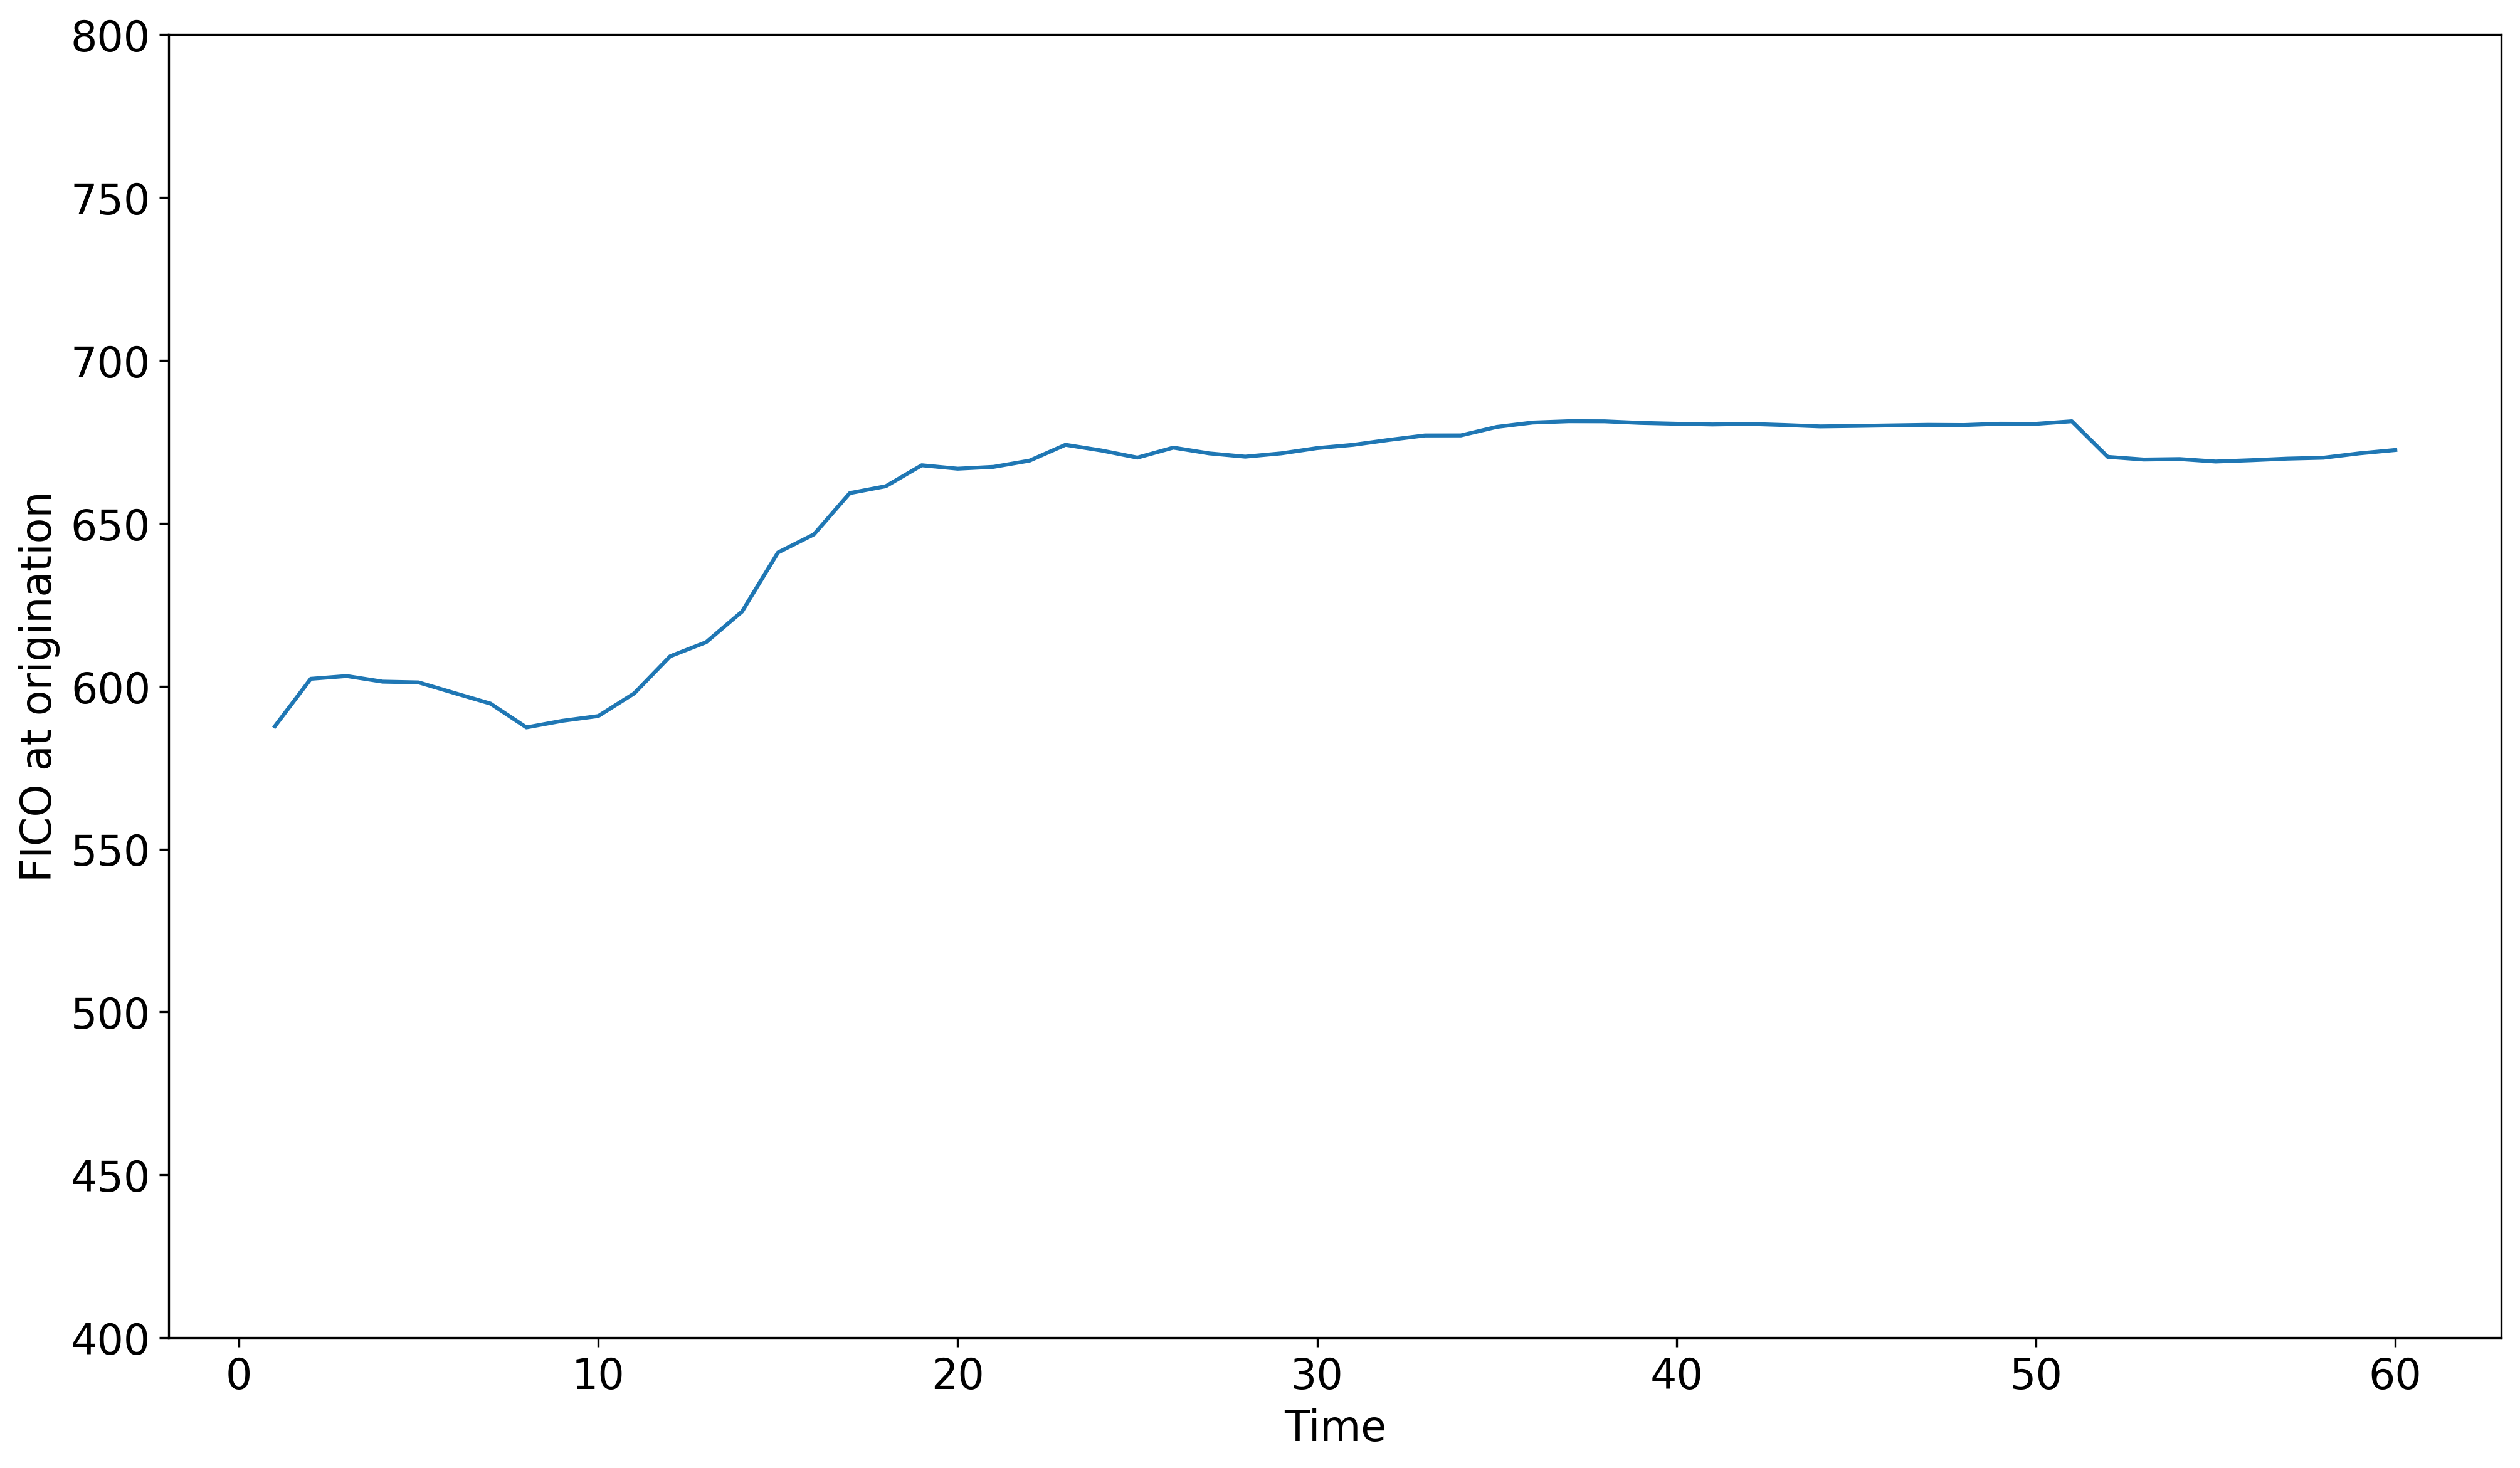

In [25]:
plt.plot('time', 'FICO_orig_time', data=FICO)
plt.xlabel('Time')
plt.ylabel('FICO at origination')
plt.ylim([400, 800])
plt.show()

#### Generating new variables

In [26]:
data.loc[:, 'dummy'] = 0
# generating a new column dummy = 0

In [28]:
data.loc[data['LTV_orig_time'] > 70, 'dummy'] = 1
# create new variable dummy and set it = 1 if LTV orig time is > 70

# data[['LTV_orig_time']].round(decimals = 2)

#### Transforming variables

In [29]:
data.loc[:, 'FICO_orig_time2'] = data.loc[:, 'FICO_orig_time']+10
# add FICO orig time by 10

print(data[['FICO_orig_time', 'FICO_orig_time2']].head(10))

   FICO_orig_time  FICO_orig_time2
0             587              597
1             587              597
2             587              597
3             587              597
4             587              597
5             587              597
6             587              597
7             587              597
8             587              597
9             587              597


In [30]:
data.loc[:, 'FICO_orig_time2'] = data.loc[:, 'FICO_orig_time']
# duplicate the data

data.loc[data['FICO_orig_time2'] <= 600, 'FICO_orig_time2'] = 600
# capping / winsoring the lower bound

data.loc[data['FICO_orig_time2'] >= 700, 'FICO_orig_time2'] = 700
# capping / winsoring the upper bound

print(data[['FICO_orig_time', 'FICO_orig_time2']].head(10))

   FICO_orig_time  FICO_orig_time2
0             587              600
1             587              600
2             587              600
3             587              600
4             587              600
5             587              600
6             587              600
7             587              600
8             587              600
9             587              600


#### Subsetting data

- We use `dataframe.variable_name` or `dataframe[['variable_name']]` for variable selection;
- `.copy()` statement informs pandas to make a copy of the original data;
- Importantly, pandas offers label (`dataframe.loc`) and position based indexing (`dataframe.iloc`);
- Using `[[]]` returns a dataframe while `[]` returns only a slice of a dataframe;
- The arguments in square brackets `[row,column]` indicate the rows and columns separated by a comma. `:` indicates all rows or all columns.

In [38]:
data2 = data.loc[:, 'FICO_orig_time'].copy()
# is the same with
data2 = data.iloc[:, 18].copy()

print(data2.shape)
# a data slice has no column name

(62178,)


Below is another sub-sample (first row) of the data set

In [39]:
data2 = data.loc[0, :].copy()
data2 = data.iloc[0, :].copy()
print(data2.shape)

(30,)


We might also want to filter the data with a certain condition, can use the `dataframe.query()` command. Note that if rows are deleted the index is retained and gaps in the index sequence can be observed

In [40]:
data2 = data.query('FICO_orig_time >= 800').copy()
print(data2.index)

Index([   53,    54,    55,    56,    67,    71,  3244,  3245,  3246,  3247,
       ...
       61844, 61873, 61874, 61875, 61876, 61877, 61878, 61879, 61880, 61881],
      dtype='int64', length=838)


Random sampling, we can control that the random process will produce the same outcome with setting seed value.

In [41]:
data2 = data.sample(100, random_state=12345)
print(data2.shape)

(100, 30)


Droping features

In [42]:
data2 = data.drop('LTV_orig_time', axis='columns').copy()
print(data2.shape)

(62178, 29)


In [43]:
data2 = data.drop(0, axis='rows').copy()
print(data2.shape)

(62177, 30)


#### Combining data

- `.concat` combines two dataframes based on the axis (combine rows or columns);
- `.append` combines the rows of two dataframes;
- `.merge` combines two dataframes based on matching of values of columns in datasets;
- `.join` combines two dataframes based on matching of indexes.

##### Concatenating

combining columns

In [44]:
hpi_time = data.loc[:,['time', 'hpi_time']].drop_duplicates().reset_index(drop=True)
uer_time = data.loc[:,['time', 'uer_time']].drop_duplicates().reset_index(drop=True)
gdp_time = data.loc[:,['time', 'gdp_time']].drop_duplicates().reset_index(drop=True)

macro_time = pd.concat([hpi_time, uer_time, gdp_time], axis=1) # concatenating column
print(macro_time.shape)

(60, 6)


combining rows

In [45]:
macro_time2 = pd.concat([hpi_time, hpi_time], axis=0) # concatenating rows
print(macro_time2.shape)

(120, 2)


##### Appending

**This is deprecated in Pandas 2.0**

In [47]:
# macro_time2 = hpi_time.append(hpi_time)
# print(macro_time2.shape)

##### Merging

In [48]:
data_orig_time = data[['id', 'orig_time', 'first_time', 'mat_time', 'res_time', 'REtype_CO_orig_time', 'REtype_PU_orig_time', 'REtype_SF_orig_time', 'investor_orig_time', 'balance_orig_time', 'FICO_orig_time', 'LTV_orig_time', 'Interest_Rate_orig_time', 'state_orig_time', 'hpi_orig_time']].drop_duplicates(subset='id', keep='first')
# keep only one observation per loan using drop_duplicates(subset='id', keep='first')

data_time = data[['id', 'time', 'balance_time', 'LTV_time', 'interest_rate_time', 'rate_time', 'default_time', 'payoff_time', 'status_time', 'lgd_time', 'recovery_res']]
# keep all observations

macro_time = data[['time', 'hpi_time', 'gdp_time', 'uer_time']].drop_duplicates()

print('data:', data.shape)
print('data_orig_time:', data_orig_time.shape)
print('data_time:', data_time.shape)
print('macro_time:', macro_time.shape)

data: (62178, 30)
data_orig_time: (5000, 15)
data_time: (62178, 11)
macro_time: (60, 4)


In [49]:
data2 = pd.merge(data_orig_time, data_time, on='id')
data3 = pd.merge(data2, macro_time, on='time')
print('Original dataframe data:', data.shape)
print('Reconstituted dataframe data3:', data3.shape)

Original dataframe data: (62178, 30)
Reconstituted dataframe data3: (62178, 28)


##### Joining

`join` combines two dataframes based on **indexes**

In [50]:
hpi_time = data.loc[:,['time', 'hpi_time']].drop_duplicates().reset_index(drop=True)
uer_time = data.loc[:,['time', 'uer_time']].drop_duplicates().reset_index(drop=True)
macro_time3 = hpi_time.set_index('time').join(uer_time.set_index('time'), on='time')
print(macro_time3.shape)

(60, 2)


#### Simple regression models

try to fit a simple regression model with `statsmodels.formula.api` \ `smf`

In [51]:
data_ols = smf.ols(formula='LTV_time ~ LTV_orig_time + gdp_time', data=data).fit()

show the **summary**

In [52]:
print(data_ols.summary())

                            OLS Regression Results                            
Dep. Variable:               LTV_time   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     8772.
Date:                Mon, 28 Oct 2024   Prob (F-statistic):               0.00
Time:                        00:15:59   Log-Likelihood:            -2.8781e+05
No. Observations:               62153   AIC:                         5.756e+05
Df Residuals:                   62150   BIC:                         5.756e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.8450      0.773     17.901

#### `pandas` dataframe to `numpy` array and vice versa.

+ `pandas.dataframes` are enhanced arrays:
    - they can be accessed by integer positions (which we use for rows) as well as labels (which we use for columns/features);
    - offers a large range of econometric data operations, including sampling, aggregation, leading/lagging that are particularly helpful for credit risk data;
+ `numpy.array` offers the creation and processing of multi-dimensional arrays, linear algebra and random number capabilities:
    - are accessed by their integer position with zero as a base;
    - are more efficient than Python lists;
    - can be accessed by indexes as Python lists.


In [55]:
data2 = data[['id', 'time', 'gdp_time', 'FICO_orig_time', 'LTV_time']].round(decimals=2)
# pd dataframe

clabels = data2.columns.values
# columns of the df

data_numpy = data2.values
# data of the df, this is numpy array

data_numpy
# inner brackets indicate rows data

array([[4.0000e+00, 2.5000e+01, 2.9000e+00, 5.8700e+02, 3.3910e+01],
       [4.0000e+00, 2.6000e+01, 2.1500e+00, 5.8700e+02, 3.4010e+01],
       [4.0000e+00, 2.7000e+01, 2.3600e+00, 5.8700e+02, 3.4340e+01],
       ...,
       [4.9972e+04, 5.4000e+01, 1.5100e+00, 7.0800e+02, 9.1870e+01],
       [4.9972e+04, 5.5000e+01, 2.4200e+00, 7.0800e+02, 9.1560e+01],
       [4.9972e+04, 5.6000e+01, 1.7200e+00, 7.0800e+02, 9.0870e+01]])

In [56]:
data=pd.DataFrame(data=data_numpy, columns=clabels)

data.head(10)

,id,time,gdp_time,FICO_orig_time,LTV_time
0,4.0,25.0,2.90,587.0,33.91
1,4.0,26.0,2.15,587.0,34.01
2,4.0,27.0,2.36,587.0,34.34
3,4.0,28.0,1.23,587.0,34.67
4,4.0,29.0,1.69,587.0,34.95
5,4.0,30.0,2.27,587.0,35.62
6,4.0,31.0,1.85,587.0,37.66
7,4.0,32.0,1.10,587.0,40.50
8,4.0,33.0,0.84,587.0,41.64
9,4.0,34.0,-0.31,587.0,43.23


#### Module `dcr` and various functions

The module provides some functions:
- `versions`: produces a table with the package versions in our environment;
- `dataprep`: generates economic features, principal components and clusters. Train and test datasets are provided for machine learning techniques for PD and LGD models;
- `woe`: computes weight of evidence and information value for features;
- `validation`: computes a number of validation measures and visual validation plots;
- `resolutionbias`: corrects observed LGD values for resolution bias.

In [57]:
versions()

                     Package Version  Acronym
0                     Python   3.11.      NaN
1                    IPython     NaN  IPython
2                       math     NaN     math
3   matplotlib.pyplot, pylab   3.9.2      plt
4                      numpy  1.26.4       np
5                     pandas   2.2.3       pd
6                     pickle     4.0   pickle
7                     random     NaN   random
8                      scipy  1.14.1    scipy
9                    sklearn   1.5.2  sklearn
10               statsmodels  0.14.4       sm


#### Sandbox Problems

In [63]:
# Create a data subset labeled data2, which includes the variables id, time, LTV_orig_time and LTV_time.
from dcr import data
data2 = data[['id', 'time', 'LTV_orig_time', 'LTV_time']]

In [65]:
# Provide descriptive statistics for variables LTV_orig_time and LTV_time.
data2[['LTV_orig_time', 'LTV_time']].describe().round(decimals = 2)

,LTV_orig_time,LTV_time
count,62178.00,62153.00
mean,78.70,83.32
std,10.24,28.11
min,50.10,0.00
25%,75.00,67.06
50%,80.00,82.26
75%,80.00,100.77
max,119.80,803.51


In [68]:
# Filter dataset data for loans with a FICO score above 800
FICO_800 = data.query('FICO_orig_time > 800').copy()

FICO_800.head(10)

,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,...,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,lgd_time,recovery_res,dummy,FICO_orig_time2
53,20443,59,59,59,177,NaN,630392.94,74.602715,4.500,2.17,...,4.500,AL,187.65,0,0,0,NaN,NaN,1,700
54,20443,60,59,59,177,NaN,627841.96,73.451425,4.500,2.17,...,4.500,AL,187.65,0,0,0,NaN,NaN,1,700
55,20444,59,59,59,177,NaN,691646.41,79.682766,4.500,2.17,...,4.500,NJ,187.65,0,0,0,NaN,NaN,1,700
56,20444,60,59,59,177,NaN,311520.28,35.479149,4.500,2.17,...,4.500,NJ,187.65,0,0,0,NaN,NaN,1,700
67,20455,60,60,60,178,NaN,1093905.69,63.844314,4.250,1.94,...,4.250,CA,189.82,0,1,2,NaN,NaN,0,700
71,20459,60,60,60,178,NaN,955773.11,79.647759,4.250,1.94,...,4.250,CA,189.82,0,0,0,NaN,NaN,1,700
3244,3533,26,23,26,144,NaN,66117.88,78.531195,6.875,4.39,...,6.875,MI,221.91,0,0,0,NaN,NaN,1,700
3245,3533,27,23,26,144,NaN,66002.75,79.349749,6.875,4.39,...,6.875,MI,221.91,0,0,0,NaN,NaN,1,700
3246,3533,28,23,26,144,NaN,65827.57,80.119062,6.875,4.39,...,6.875,MI,221.91,0,0,0,NaN,NaN,1,700
3247,3533,29,23,26,144,NaN,65649.37,80.747621,6.875,4.39,...,6.875,MI,221.91,0,0,0,NaN,NaN,1,700


In [72]:
# Provide a frequency table that shows the number of defaults in the sample.
table = pd.crosstab(data.orig_time, data.default_time, margins=True)

table.head(10)

default_time,0,1,All
orig_time,,,
-40,51,0,51
-35,4,0,4
-33,3,0,3
-24,1,0,1
-23,1,0,1
-21,0,1,1
-19,24,0,24
-18,16,0,16
-16,19,0,19


In [73]:
# Provide a cross-frequency table by variables default_time and time.
table2 = pd.crosstab(data.time, data.default_time, margins=True)

table2.head(10)

default_time,0,1,All
time,,,
1,21,0,21
2,51,0,51
3,94,2,96
4,90,2,92
5,90,3,93
6,96,3,99
7,86,3,89
8,76,1,77
9,78,2,80


# 3 Risk-based Learning
pg. 47-67

In [76]:
%reset

import warnings; warnings.simplefilter('ignore')
from dcr import *
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams.update({'font.size': 16})

# 4 Machine Learning
pg. 68-90